# Housing Price Prediction Project

In [2]:
import pandas as pd 
import os

## Loading the dataset

In [3]:
# load dataset
file_path = os.path.join(os.getcwd(), '..', 'datasets' ,'housing.csv')
df_housing = pd.read_csv(file_path)


# Show the Head of the DF
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Getting Some info one data


In [4]:
# summary of the DataFrame
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Check the nulls
df_housing.isna().sum(axis=0)  

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Univariate analysis

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

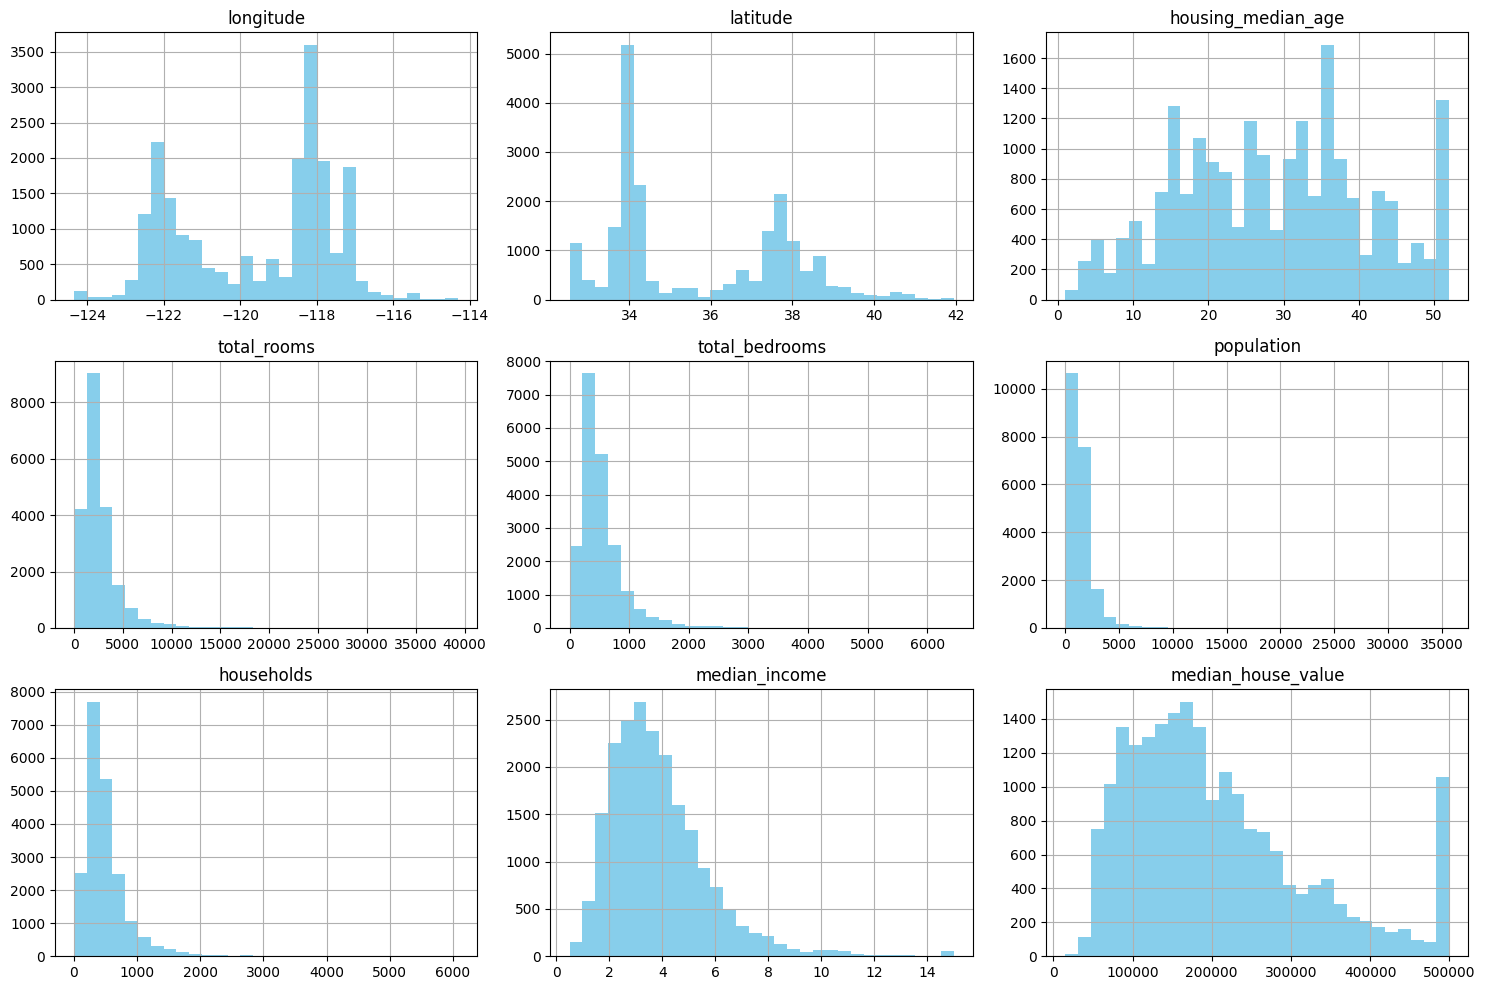

In [7]:
# Univariate analysis for numerical columns
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                     'population', 'households', 'median_income', 'median_house_value']

# Histograms for numerical features
df_housing[numerical_columns].hist(bins=30, figsize=(15, 10), color='skyblue')
plt.tight_layout()
plt.show()

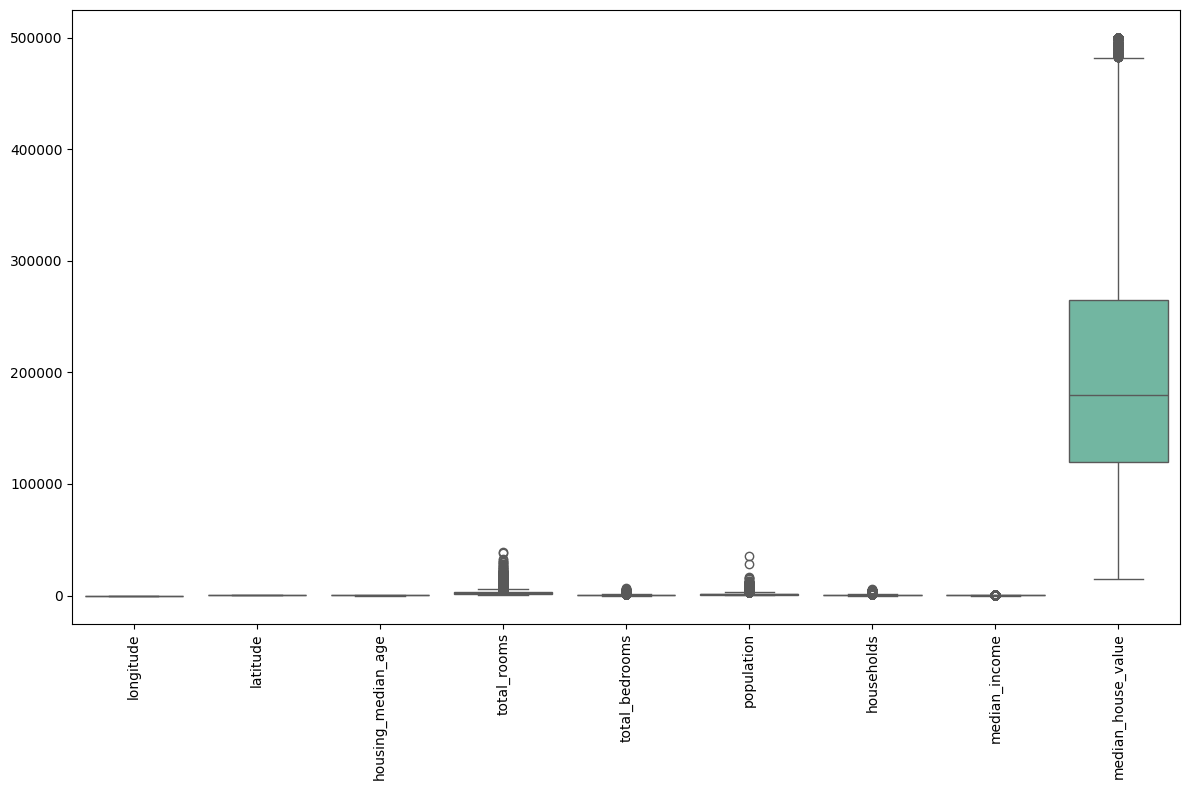

In [8]:
# Box plots to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_housing[numerical_columns], palette="Set2")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

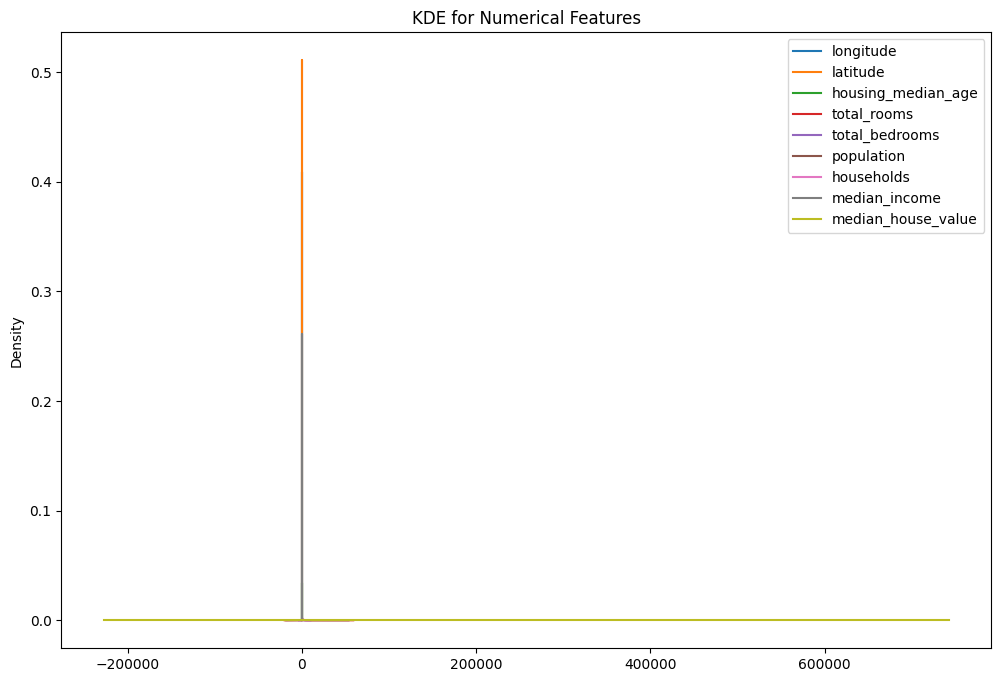

In [9]:
# KDE (Kernel Density Estimate) for numerical columns
df_housing[numerical_columns].plot(kind='kde', figsize=(12, 8))
plt.title('KDE for Numerical Features')
plt.show()


/tmp/ipykernel_7139/1463039591.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ocean_proximity', data=df_housing, palette="pastel")


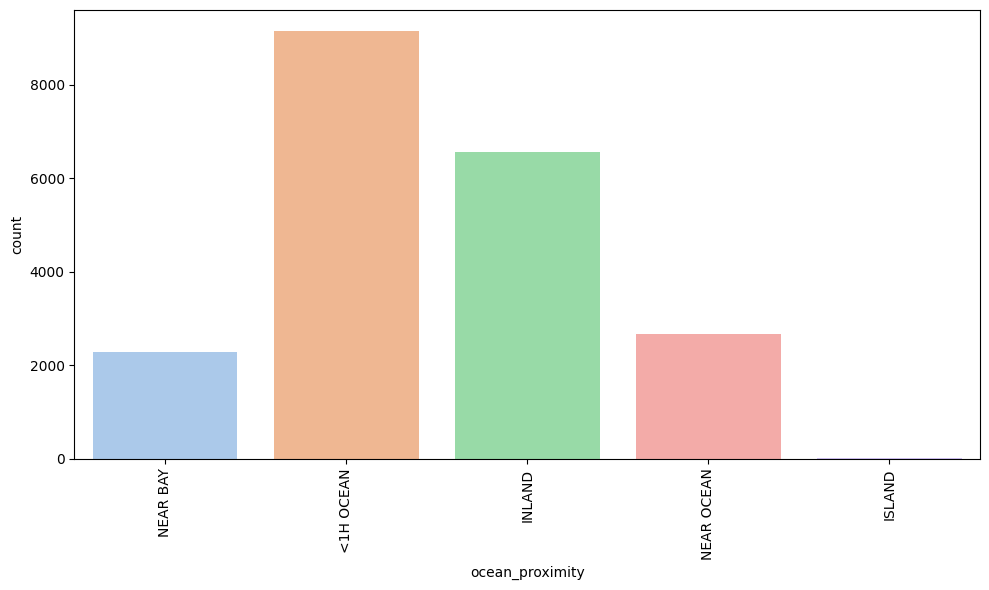

In [10]:
# Categorical feature (ocean_proximity) univariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=df_housing, palette="pastel")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
# Replace the  (<1H OCEAN) to (1H OCEAN) 
df_housing['ocean_proximity'] = df_housing['ocean_proximity'].replace('<1H OCEAN', '1H OCEAN')

/tmp/ipykernel_7139/3046253620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ocean_proximity', data=df_housing, palette="pastel")


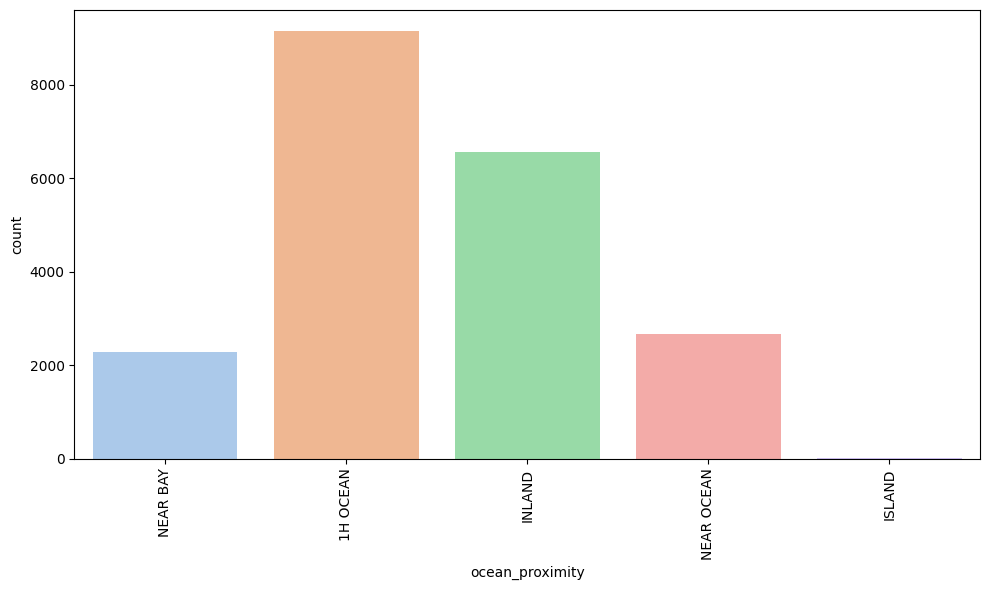

In [12]:
# Countplot for each categorical feature 
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=df_housing, palette="pastel")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Bivariate Analysis


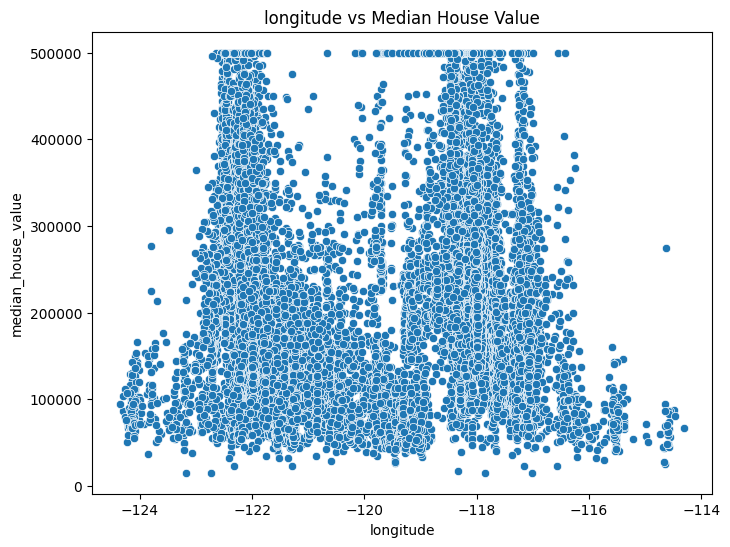

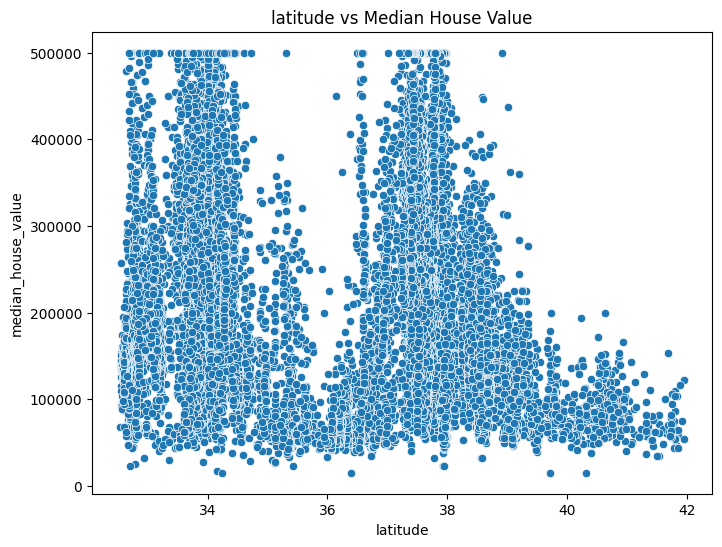

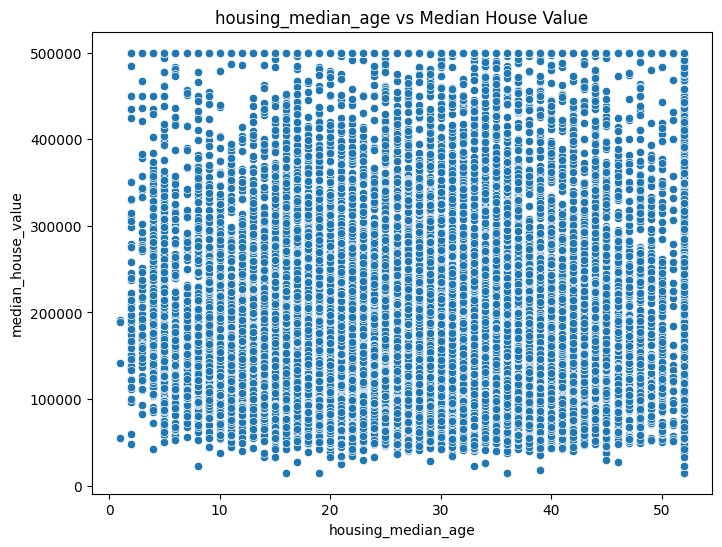

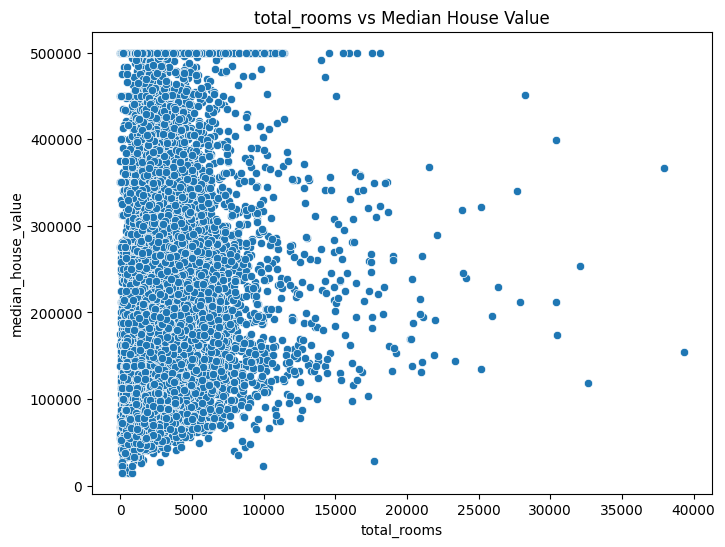

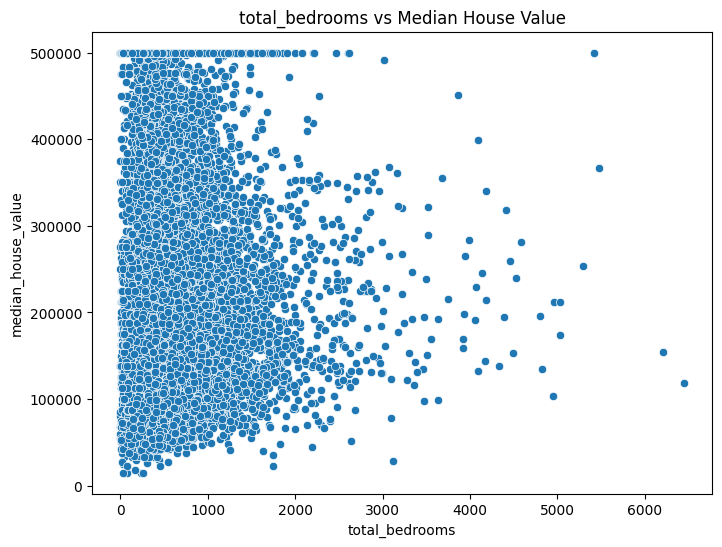

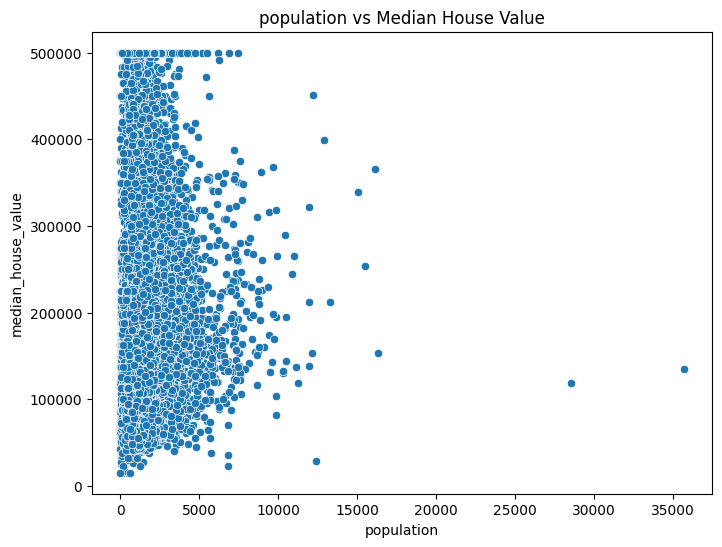

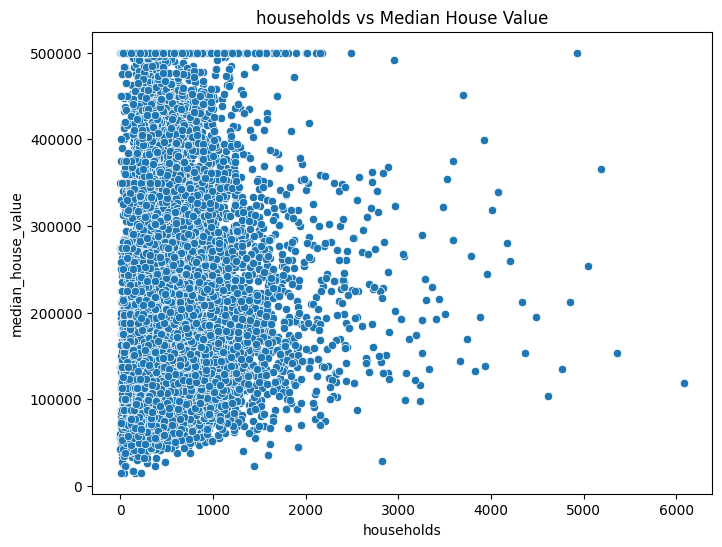

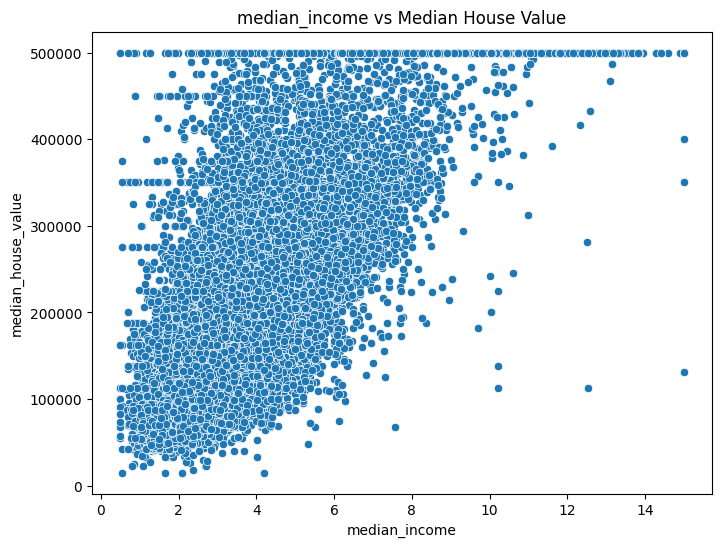

In [13]:
# Scatter plots for numerical features vs median_house_value
for column in numerical_columns[:-1]:  # Exclude target 'median_house_value'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y='median_house_value', data=df_housing)
    plt.title(f'{column} vs Median House Value')
    plt.show()

/tmp/ipykernel_7139/4292080457.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ocean_proximity', y='median_house_value', data=df_housing, palette="Set3")


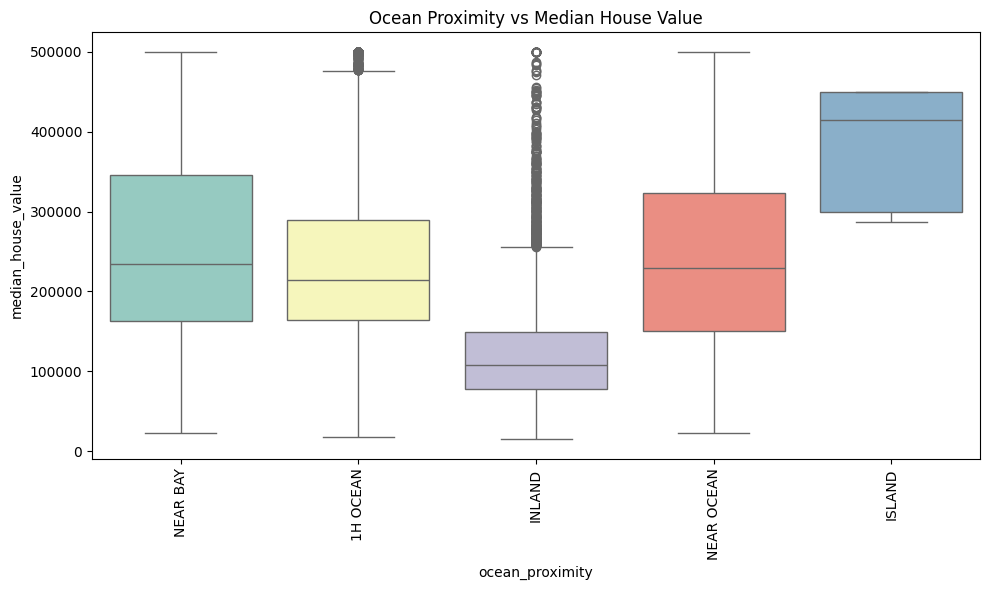

In [14]:
# Boxplot for ocean_proximity against median_house_value
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df_housing, palette="Set3")
plt.xticks(rotation=90)
plt.title('Ocean Proximity vs Median House Value')
plt.tight_layout()
plt.show()

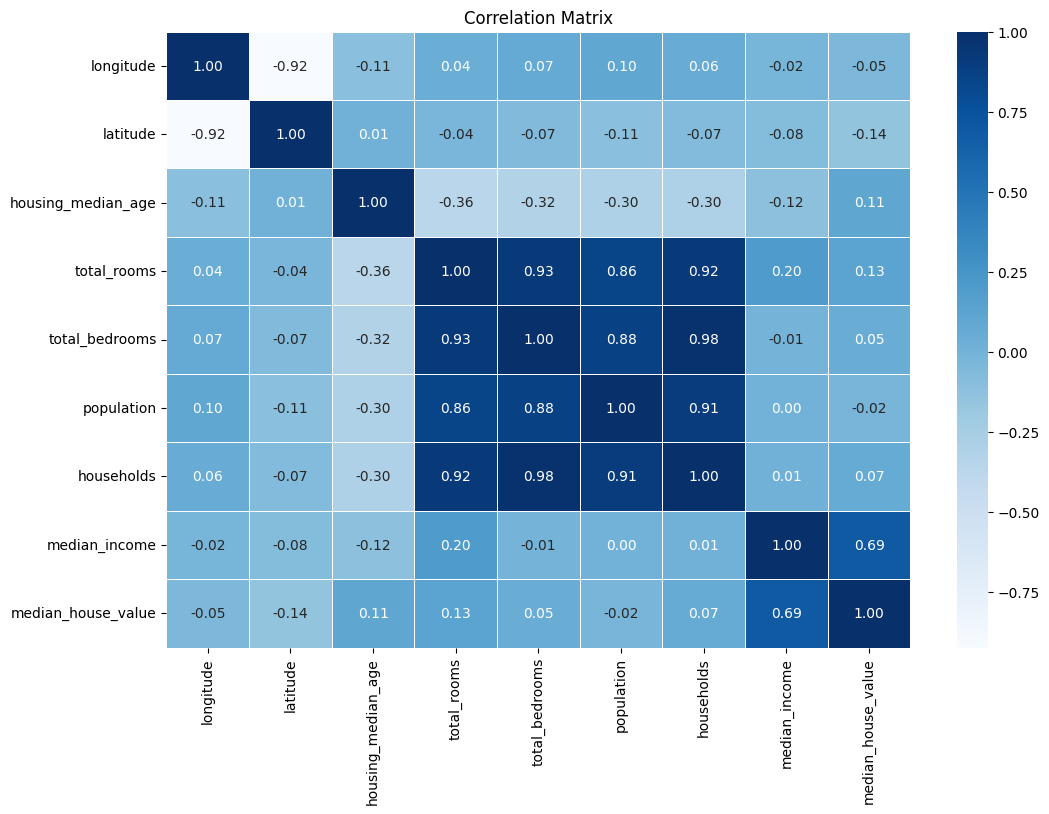

In [15]:
# Correlation heatmap to check relationships between features and target
plt.figure(figsize=(12, 8))
corr_matrix = df_housing[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="Blues", linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Multivariate Analysis (Pair Plot)

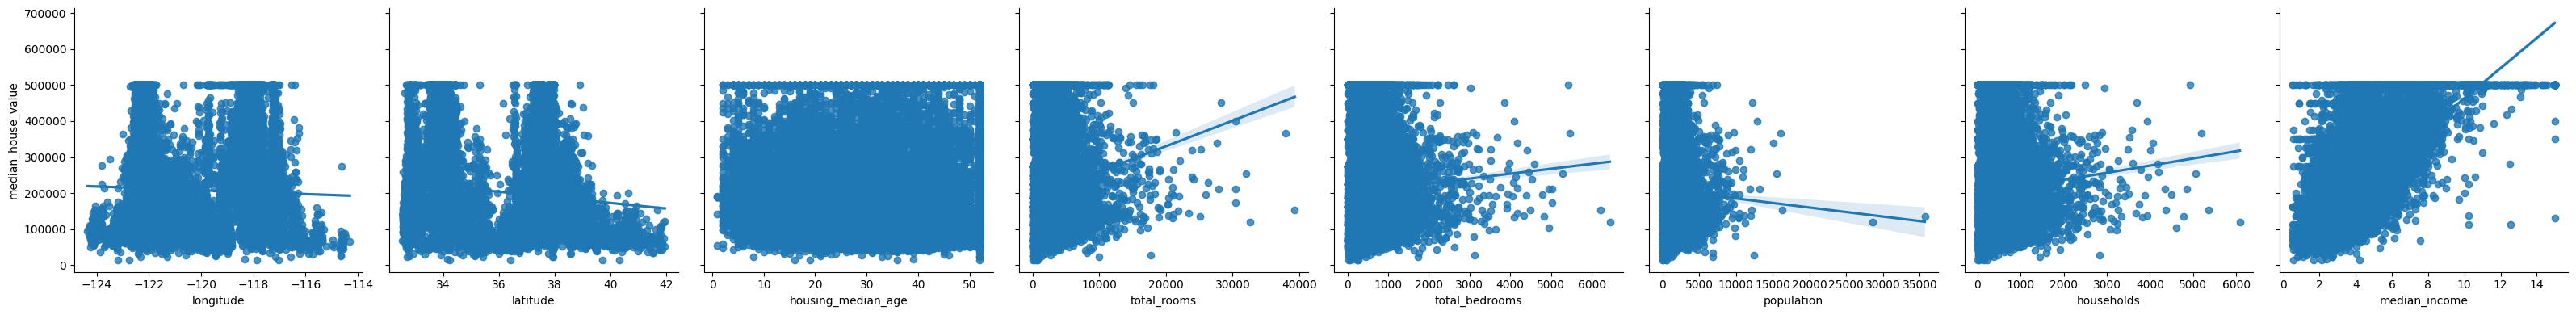

In [16]:
# Pair plot highlighting the target (median_house_value)
sns.pairplot(df_housing, y_vars='median_house_value', x_vars=numerical_columns[:-1], height=4, aspect=1, kind='reg')
plt.tight_layout()
plt.show()


## Check the Correlation between the Features and Target

In [17]:
# Using pearson correlation
target = 'median_house_value'
df_housing[numerical_columns].corr()[target].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Feature Engineering
Try to add some features, thinking that it will be more useful and more correlated to the target

In [18]:
# Feature Engineering --> Feature Extraction --> Add the new column to the main DF
df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']
df_housing['bedroms_per_rooms'] = df_housing['total_bedrooms'] / df_housing['total_rooms']
df_housing['population_per_household'] = df_housing['population'] / df_housing['households']

In [20]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedroms_per_rooms         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [21]:
# Drop non-numeric columns before computing correlation
numeric_df_housing = df_housing.select_dtypes(include=[float, int])

# Compute correlation with the target (median_house_value)
correlation = numeric_df_housing.corr()[target].sort_values(ascending=False)

In [22]:
correlation

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

## Splitting dataset

In [23]:
from sklearn.model_selection import train_test_split

In [37]:
# Define the dataset
x = df_housing.drop(columns=['median_house_value'], axis=1)
y = df_housing['median_house_value']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=True, random_state=42)

# Print the shapes of the train and test datasets
print('X_train shape  ', X_train.shape)
print('y_train shape  ', y_train.shape)
print('X_test shape  ', X_test.shape)
print('y_test shape  ', y_test.shape)

X_train shape   (17544, 12)
y_train shape   (17544,)
X_test shape   (3096, 12)
y_test shape   (3096,)


## Preprocessing the dataset

In [31]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [38]:
# Automatically detect numerical and categorical columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Define the numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values by filling with the median
    ('scaler', StandardScaler())                   # Standardize the data (zero mean, unit variance)
])

# Define the categorical pipeline
categ_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values by replacing with 'missing'
    ('onehot', OneHotEncoder(sparse_output=False))                          # One-hot encode the categorical data
])

# Combine both pipelines using ColumnTransformer
preprocessing_pipeline = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_columns),          # Apply numerical pipeline to numerical columns
    ('cat', categ_pipeline, categorical_columns)       # Apply categorical pipeline to categorical columns
])


In [39]:
# Fit and transform the train set, and transform the test set
X_train_final = preprocessing_pipeline.fit_transform(X_train)
X_test_final = preprocessing_pipeline.transform(X_test)

# Print the final transformed datasets
print("Transformed X_train shape: ", X_train_final.shape)
print("Transformed X_test shape: ", X_test_final.shape)

Transformed X_train shape:  (17544, 16)
Transformed X_test shape:  (3096, 16)


## Training and Testing

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
#  Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

In [55]:
# Dictionary to store cross-validation results and test metrics
cv_results = {}
test_metrics = {}

# Using tqdm for a progress bar
print("Starting model evaluation with cross-validation...\n")

# Perform cross-validation for each model
for model_name, model in tqdm(models.items(), desc="Evaluating Models", ncols=100):
    print(f"\nEvaluating {model_name}...")
    
    # Cross-validation scores
    scores = cross_val_score(model, X_train_final, y_train, cv=5, scoring='r2')
    mean_cv_score = scores.mean()
    cv_results[model_name] = mean_cv_score

    # Use cross_val_predict to get predictions using cross-validation
    y_pred_cv = cross_val_predict(model, X_train_final, y_train, cv=5)

    # Calculate metrics based on cross-validated predictions
    r2 = r2_score(y_train, y_pred_cv)
    mae = mean_absolute_error(y_train, y_pred_cv)
    mse = mean_squared_error(y_train, y_pred_cv)

    # Store test metrics
    test_metrics[model_name] = {
        'R² (CV)': r2,
        'MAE (CV)': mae,
        'MSE (CV)': mse
    }

Starting model evaluation with cross-validation...



Evaluating Models:  25%|███████████▌                                  | 1/4 [00:00<00:00,  9.34it/s]


Evaluating Linear Regression...

Evaluating Decision Tree...


Evaluating Models:  50%|███████████████████████                       | 2/4 [00:03<00:03,  1.95s/it]


Evaluating Random Forest...


Evaluating Models:  75%|██████████████████████████████████▌           | 3/4 [03:36<01:38, 98.32s/it]


Evaluating XGBoost...


Evaluating Models: 100%|██████████████████████████████████████████████| 4/4 [03:42<00:00, 55.66s/it]


In [56]:
# Display the cross-validation results
print("\nCross-validation completed. Summary of results:")
for model_name, score in cv_results.items():
    print(f"{model_name}: Average R^2 score = {score:.4f}")


Cross-validation completed. Summary of results:
Linear Regression: Average R^2 score = 0.6547
Decision Tree: Average R^2 score = 0.6204
Random Forest: Average R^2 score = 0.8094
XGBoost: Average R^2 score = 0.8337


In [59]:
test_metrics

{'Linear Regression': {'R² (CV)': 0.6547304001017928,
  'MAE (CV)': np.float64(48825.350647885745),
  'MSE (CV)': np.float64(4610259090.477916)},
 'Decision Tree': {'R² (CV)': 0.6210498379167373,
  'MAE (CV)': np.float64(45215.550729594164),
  'MSE (CV)': np.float64(5059983358.214889)},
 'Random Forest': {'R² (CV)': 0.809233019889326,
  'MAE (CV)': np.float64(32885.56883150934),
  'MSE (CV)': np.float64(2547241936.3811507)},
 'XGBoost': {'R² (CV)': 0.8336356461147569,
  'MAE (CV)': np.float64(30969.199082151485),
  'MSE (CV)': np.float64(2221402565.0015216)}}

In [61]:
# Display the test metrics
print("\nTest set metrics:")
for model_name, metrics in test_metrics.items():
    print(f"{model_name}: R² (CV) = {metrics['R² (CV)']:.4f}, MAE (CV) = {metrics['MAE (CV)']:.4f}, MSE (CV) = {metrics['MSE (CV)']:.4f}")



Test set metrics:
Linear Regression: R² (CV) = 0.6547, MAE (CV) = 48825.3506, MSE (CV) = 4610259090.4779
Decision Tree: R² (CV) = 0.6210, MAE (CV) = 45215.5507, MSE (CV) = 5059983358.2149
Random Forest: R² (CV) = 0.8092, MAE (CV) = 32885.5688, MSE (CV) = 2547241936.3812
XGBoost: R² (CV) = 0.8336, MAE (CV) = 30969.1991, MSE (CV) = 2221402565.0015


In [62]:
# Determine the best model based on cross-validated R² score
best_model_name = max(test_metrics, key=lambda x: test_metrics[x]['R² (CV)'])
print(f"\nBest model based on cross-validated R² score: {best_model_name} with R² score: {test_metrics[best_model_name]['R² (CV)']:.4f}")



Best model based on cross-validated R² score: XGBoost with R² score: 0.8336


##  saving best model

In [63]:
import joblib

In [65]:
# Fit the best model on the full training data
best_model = models[best_model_name]
best_model.fit(X_train_final, y_train)

# Create 'saved_models' directory if it doesn't exist
os.makedirs('../saved_models', exist_ok=True)

# Dump the best model to a file in the 'saved_models' directory
model_filename = f"../saved_models/best_model_{best_model_name.replace(' ', '_').lower()}.joblib"
joblib.dump(best_model, model_filename)

print(f"\nBest model saved as '{model_filename}'")



Best model saved as '../saved_models/best_model_xgboost.joblib'
